Import all the required packages

In [1]:
#Pandas data is short for panel data that help to manipulate data in python
import pandas as pd
#Numpy is help to generate random numbers and do other many things
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Import the CIFAR-10 image dataset
from keras.datasets import cifar10
#Load the dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()


In [3]:
print(xTrain.shape)

(50000, 32, 32, 3)


In [4]:
print(yTrain.shape)

(50000, 1)


In [5]:
print(xTest.shape)

(10000, 32, 32, 3)


In [6]:
print(yTest.shape)

(10000, 1)


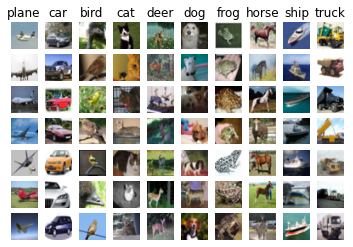

In [7]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Visualize the dataset.
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(yTrain == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(xTrain[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


Create the traing and testing data

In [8]:
xVal = xTrain[1000:, :].astype(np.float)
yVal = np.squeeze(yTrain[1000:, :])
xTrain = xTrain[:1000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:1000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

Train image shape:    (1000, 32, 32, 3)
Train label shape:    (1000,)
Validate image shape: (49000, 32, 32, 3)
Validate label shape: (49000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


In [9]:
meanImage = np.mean(xTrain, axis=0)
print(meanImage.shape)
print('---------------------')
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage



print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])



(32, 32, 3)
---------------------
(1000, 32, 32, 3)
(1000,)
(1000, 3072)
[-74.467 -76.524 -71.487 ...  -5.443 -35.53  -43.33 ]


In [10]:
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(xTrain, yTrain)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Building the Model

In [11]:
#Import the Support Vector Machine (SVM) model
from sklearn.svm import SVC

In [12]:
model = SVC(probability=False,  kernel="linear", C=0.1)

In [13]:
model = SVC()

In [14]:
#xTrain = (xTrain.reshape(xTrain.shape[0], xTrain.shape[1] * xTrain.shape[2] * xTrain.shape[3]))
#yTrain = (yTrain.reshape(yTrain.shape[0], yTrain.shape[1] * yTrain.shape[2] * yTrain.shape[3]))
#xTrain = xTrain.reshape(49000,32*32*3)
#yTrain = yTrain.reshape(10,3*224*224)
#xTest = xTest.reshape(10000,32*32*3)


In [15]:
#Fit the Model using the fit() method by pssing the X_train and y_train
model.fit(xTrain,yTrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#Make predictions using the test data
pred = model.predict(xTest)

In [17]:
#Visualizing the Performance
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#Creat a classification report based on the test data
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1000
           1       0.39      0.46      0.42      1000
           2       0.25      0.24      0.25      1000
           3       0.25      0.14      0.18      1000
           4       0.31      0.34      0.32      1000
           5       0.35      0.23      0.28      1000
           6       0.32      0.47      0.38      1000
           7       0.40      0.33      0.36      1000
           8       0.44      0.52      0.47      1000
           9       0.40      0.46      0.43      1000

    accuracy                           0.36     10000
   macro avg       0.36      0.36      0.35     10000
weighted avg       0.36      0.36      0.35     10000



In [19]:
#This model predict that 48 healthy patient have cancer.


In [20]:
#Confusion matrix reprsent the performance of the model to classify labels
cm = np.array(confusion_matrix(yTest, pred, labels=[1,0]))
confusion = pd.DataFrame(cm)
confusion

,0,1
0,455,32
1,57,426


Improve the Model Performance by Normalization

In [21]:
#IMPORT PREPROCESSING METHODS
from sklearn import preprocessing

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()

In [23]:
#Normalization and Fit transform to X_tain data and X_test data
xTrain_scaled = min_max_scaler.fit_transform(xTrain)
xTest_scaled = min_max_scaler.fit_transform(xTest)

In [24]:
#Fit the Model using the fit() method by pssing the X_train_scaled and y_train
model.fit(xTrain_scaled,yTrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
#Make predictions using the test data
y_predict = model.predict(xTest_scaled)

In [26]:
#Creat a classification report based on the test data
print(classification_report(yTest, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1000
           1       0.40      0.45      0.42      1000
           2       0.25      0.24      0.24      1000
           3       0.25      0.14      0.18      1000
           4       0.31      0.34      0.32      1000
           5       0.35      0.23      0.28      1000
           6       0.31      0.46      0.38      1000
           7       0.40      0.33      0.36      1000
           8       0.44      0.52      0.48      1000
           9       0.40      0.45      0.43      1000

    accuracy                           0.36     10000
   macro avg       0.36      0.36      0.35     10000
weighted avg       0.36      0.36      0.35     10000



In [27]:
#Confusion matrix reprsent the performance of the model to classify labels
cm = np.array(confusion_matrix(yTest, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm)
confusion

,0,1
0,453,32
1,54,427


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(accuracy_score(yTest, y_predict))

0.3601
